# Horizontal Lines Plot Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Example 1

In [2]:
# Say you have various data series starting and
# ending on different dates

# Create series from random data
list_of_series = []
for i in range(10):
    n = np.random.randint(10, 20)
    data = np.random.randn(n)
    start_date = np.random.choice(pd.date_range('2018-01-01', '2018-01-20'))
    end_date = start_date + pd.Timedelta(n-1, 'D')
    
    index = pd.Index(pd.date_range(start_date, end_date), name='Date')
    
    # Give each series a label
    name = "Series %d" % i
    
    x = pd.Series(data, index=index, name=name)
    list_of_series.append(x)

# Pandas will ensure each series is aligned by date
df = pd.concat(list_of_series, axis=1)
df.head()

,Series 0,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9
Date,,,,,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373688,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.451189,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.380483,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.411608,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.525086,0.549781,NaN,-1.012275


In [3]:
# Find first and last dates of each series
data = [
    (df[col].first_valid_index(), df[col].last_valid_index())
    for col in df.columns
]
index = pd.Index(df.columns, name='Series')
start_end_dates = pd.DataFrame(data, index=index, 
                               columns=['First Date', 'Last Date'])
start_end_dates = start_end_dates.sort_values(by='First Date',
                                              ascending=False)
start_end_dates.head()

,First Date,Last Date
Series,,
Series 8,2018-01-20,2018-01-31
Series 2,2018-01-18,2018-02-02
Series 5,2018-01-17,2018-01-30
Series 0,2018-01-16,2018-01-31
Series 1,2018-01-16,2018-02-01


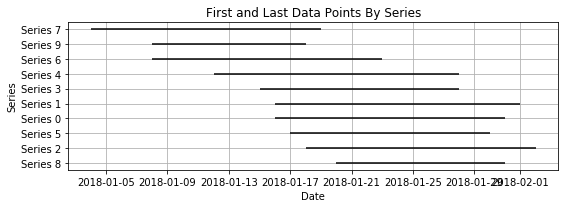

In [4]:
import matplotlib.dates as dt

fig = plt.figure(figsize=(8, n//3))
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(start_end_dates.index, 
                dt.date2num(start_end_dates['First Date']), 
                dt.date2num(start_end_dates['Last Date']))
plt.title('First and Last Data Points By Series')
plt.xlabel('Date')
plt.ylabel(start_end_dates.index.name)
plt.grid()
plt.tight_layout()
plt.show()

### Example 2

In [5]:
# Suppose you have time series with categorical data
# and you want to show the changing categories over time

# Create time-series with two categories (0 and 1)
index = pd.date_range('2018-01-01', '2018-01-05')
data = {
    'A': [0, 1, 1, 1, 0],
    'B': [1, 1, 0, 0, 0],
    'C': [0, 1, 1, 0, 1]
}
df = pd.DataFrame(data, index=index)
df.head()

,A,B,C
2018-01-01,0,1,0
2018-01-02,1,1,1
2018-01-03,1,0,1
2018-01-04,1,0,0
2018-01-05,0,0,1


In [6]:
# One simple solution is to just colour the background
# of the dataframe table view
df.style.background_gradient(cmap='summer')

,A,B,C
2018-01-01 00:00:00,0,1,0
2018-01-02 00:00:00,1,1,1
2018-01-03 00:00:00,1,0,1
2018-01-04 00:00:00,1,0,0
2018-01-05 00:00:00,0,0,1
